In [1]:
# https://stackoverflow.com/questions/45741878/using-binary-crossentropy-loss-in-keras-tensorflow-backend
# https://www.machinecurve.com/index.php/2019/10/22/how-to-use-binary-categorical-crossentropy-with-keras/

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

%load_ext tensorboard
import datetime

!rm -rf ./logs/GRU

tf.config.experimental.list_physical_devices('GPU')

# RNN based Models (RNN & LSTM & GRU) using tensorflow keras

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def convert_3D(matrix):
    return np.expand_dims(matrix, -1)

In [4]:
#retrieve and format data - into labels from the dataset
def labels(filename):
    data = np.matrix(pd.read_csv(filename).values)
    data_y = data[:, 0]
    data_y-=1 
    return data_y

(5087, 3196, 1)
(5087, 3196, 1) (5087, 1) (570, 3196, 1) (570, 1)


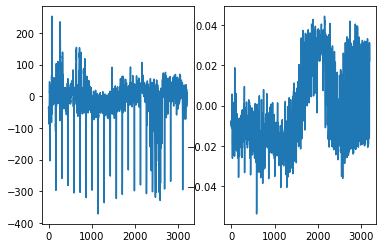

In [8]:
with open("../archive/ProcessData.npy", 'rb') as f:
        training_data_x = np.load(f)
        test_x = np.load(f)
training_data_x = convert_3D(training_data_x) 
test_x = convert_3D(test_x)

training_data_y = labels("../archive/exoTrain.csv")
test_y = labels("../archive/exoTest.csv")

training_data_x, validation_data_x, training_data_y, validation_data_y = train_test_split(training_data_x, training_data_y, test_size=0.3)

In [9]:
GRUmodel = Sequential([
    GRU(64, input_shape=(training_data_x.shape[1:]), return_sequences=True),
    #Dropout(0.3),
    GRU(64),
    #Dropout(0.3),
    #GRU(64),
    Dense(1, activation='sigmoid')
])

GRUmodel.compile(
    loss=BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.00001),
    metrics=["accuracy"]
)

log_dir = "logs/GRU/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

csv_logger = CSVLogger('keras-models/KerasGRU/training.csv',separator=",", append=False)

GRUmodel.fit(training_data_x, training_data_y, epochs=10, validation_data=(validation_data_x,validation_data_y), callbacks=[tensorboard_callback, csv_logger])

model = GRUmodel
model.save('keras-models/KerasGRU')

Epoch 1/10
112/112 [==============================] - 28s 217ms/step - loss: 0.6866 - accuracy: 0.9896 - val_loss: 0.6791 - val_accuracy: 0.9876
Epoch 2/10
112/112 [==============================] - 22s 193ms/step - loss: 0.6709 - accuracy: 0.9902 - val_loss: 0.6611 - val_accuracy: 0.9876
Epoch 3/10
112/112 [==============================] - 22s 193ms/step - loss: 0.6492 - accuracy: 0.9904 - val_loss: 0.6350 - val_accuracy: 0.9876
Epoch 4/10
112/112 [==============================] - 22s 193ms/step - loss: 0.6164 - accuracy: 0.9907 - val_loss: 0.5944 - val_accuracy: 0.9889
Epoch 5/10
112/112 [==============================] - 22s 192ms/step - loss: 0.5649 - accuracy: 0.9907 - val_loss: 0.5303 - val_accuracy: 0.9895
Epoch 6/10
112/112 [==============================] - 22s 194ms/step - loss: 0.4834 - accuracy: 0.9910 - val_loss: 0.4294 - val_accuracy: 0.9902
Epoch 7/10
112/112 [==============================] - 22s 195ms/step - loss: 0.3580 - accuracy: 0.9919 - val_loss: 0.2809 - val_ac

INFO:tensorflow:Assets written to: keras-models/KerasGRU/assets


INFO:tensorflow:Assets written to: keras-models/KerasGRU/assets


In [7]:
%tensorboard --logdir logs/GRU/fit